In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import shapely as shy
from shapely.ops import nearest_points
from shapely.geometry import Point, MultiPoint
import fiona
from scipy.spatial import cKDTree
import numpy as np

pd.options.display.max_rows = 4
%matplotlib inline
import os
os.environ["PROJ_LIB"] = "C:\ProgramData\Anaconda3\Library\share" #window

In [2]:
#Filepaths
work = r"D:"
laptop = r"C:\Users\jerem"
origin = work

In [3]:
fp = r"\Box Sync\Policy Evaluation\working_data\NYPD_Motor_Vehicle_Collisions_clean.dta"
df = pd.read_stata(origin+fp)
df.head(2)

,uniquekey,year,date,time,latenight,borough,zipcode,latitude,longitude,mi_latlong,...,contributingfactorvehicle5,vehicletypecode1,vehicletypecode2,vehicletypecode3,vehicletypecode4,vehicletypecode5,bicyclerelated,taxirelated,publicrelated,dup
0,3427749.0,2016.0,2016-04-24,1960-01-01 18:02:00,0.0,,,40.744896,-73.770203,0.0,...,,PASSENGER VEHICLE,PASSENGER VEHICLE,,,,0.0,0.0,0.0,24989.0
1,3474445.0,2016.0,2016-07-05,1960-01-01 01:30:00,1.0,,,40.650494,-74.011772,0.0,...,,PASSENGER VEHICLE,PASSENGER VEHICLE,,,,0.0,0.0,0.0,24989.0


In [4]:
# Put the latitude and longtitude 
df['Coordinates'] = list(zip(df.longitude, df.latitude))
df.head(2)

,uniquekey,year,date,time,latenight,borough,zipcode,latitude,longitude,mi_latlong,...,vehicletypecode1,vehicletypecode2,vehicletypecode3,vehicletypecode4,vehicletypecode5,bicyclerelated,taxirelated,publicrelated,dup,Coordinates
0,3427749.0,2016.0,2016-04-24,1960-01-01 18:02:00,0.0,,,40.744896,-73.770203,0.0,...,PASSENGER VEHICLE,PASSENGER VEHICLE,,,,0.0,0.0,0.0,24989.0,"(-73.77020263671875, 40.744895935058594)"
1,3474445.0,2016.0,2016-07-05,1960-01-01 01:30:00,1.0,,,40.650494,-74.011772,0.0,...,PASSENGER VEHICLE,PASSENGER VEHICLE,,,,0.0,0.0,0.0,24989.0,"(-74.01177215576172, 40.65049362182617)"


In [5]:
df['Coordinates'] = df['Coordinates'].apply(Point)
df.head(2)

,uniquekey,year,date,time,latenight,borough,zipcode,latitude,longitude,mi_latlong,...,vehicletypecode1,vehicletypecode2,vehicletypecode3,vehicletypecode4,vehicletypecode5,bicyclerelated,taxirelated,publicrelated,dup,Coordinates
0,3427749.0,2016.0,2016-04-24,1960-01-01 18:02:00,0.0,,,40.744896,-73.770203,0.0,...,PASSENGER VEHICLE,PASSENGER VEHICLE,,,,0.0,0.0,0.0,24989.0,POINT (-73.77020263671875 40.74489593505859)
1,3474445.0,2016.0,2016-07-05,1960-01-01 01:30:00,1.0,,,40.650494,-74.011772,0.0,...,PASSENGER VEHICLE,PASSENGER VEHICLE,,,,0.0,0.0,0.0,24989.0,POINT (-74.01177215576172 40.65049362182617)


In [6]:
df1 = gpd.GeoDataFrame(df, geometry='Coordinates')
df1.head(2)

,uniquekey,year,date,time,latenight,borough,zipcode,latitude,longitude,mi_latlong,...,vehicletypecode1,vehicletypecode2,vehicletypecode3,vehicletypecode4,vehicletypecode5,bicyclerelated,taxirelated,publicrelated,dup,Coordinates
0,3427749.0,2016.0,2016-04-24,1960-01-01 18:02:00,0.0,,,40.744896,-73.770203,0.0,...,PASSENGER VEHICLE,PASSENGER VEHICLE,,,,0.0,0.0,0.0,24989.0,POINT (-73.77020263671875 40.74489593505859)
1,3474445.0,2016.0,2016-07-05,1960-01-01 01:30:00,1.0,,,40.650494,-74.011772,0.0,...,PASSENGER VEHICLE,PASSENGER VEHICLE,,,,0.0,0.0,0.0,24989.0,POINT (-74.01177215576172 40.65049362182617)


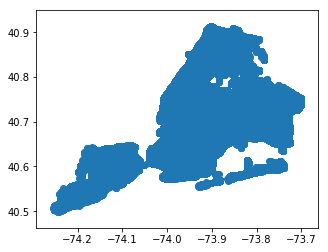

In [7]:
df1.plot()

In [8]:
df1.crs = {'init' :'epsg:4326'}

In [9]:
df1 = df1.to_crs({'init': 'epsg:2263'})

In [10]:
df1.crs

{'init': 'epsg:2263'}

In [11]:
df1.head(2)

,uniquekey,year,date,time,latenight,borough,zipcode,latitude,longitude,mi_latlong,...,vehicletypecode1,vehicletypecode2,vehicletypecode3,vehicletypecode4,vehicletypecode5,bicyclerelated,taxirelated,publicrelated,dup,Coordinates
0,3427749.0,2016.0,2016-04-24,1960-01-01 18:02:00,0.0,,,40.744896,-73.770203,0.0,...,PASSENGER VEHICLE,PASSENGER VEHICLE,,,,0.0,0.0,0.0,24989.0,POINT (1047925.420187834 210745.8332306232)
1,3474445.0,2016.0,2016-07-05,1960-01-01 01:30:00,1.0,,,40.650494,-74.011772,0.0,...,PASSENGER VEHICLE,PASSENGER VEHICLE,,,,0.0,0.0,0.0,24989.0,POINT (980983.3829843847 176268.9676320423)


In [12]:
# Open signal intersection shapefile
fp = r"\Box Sync\Policy Evaluation\input_data\DOT_traffic_signals_Oct_2018\signal_controllers.shp"
df2 = gpd.read_file(origin+fp)
df2.head(3)

,ST1_Name,ST2_Name,ST3_Name,ST4_Name,geometry
0,ALLEN STREET,CANAL STREET,None,None,POINT (986336.1490000039 199793.6093000025)
1,AVENUE OF THE AMERICAS,LAIGHT STREET,CANAL STREET,None,POINT (982769.3310000002 202206.1618999988)
2,AVENUE OF THE AMERICAS,LISPENARD STREET,WEST BROADWAY,None,POINT (982805.6183999926 201790.0942000002)


In [13]:
df2.crs

{'proj': 'lcc',
 'lat_1': 40.66666666666666,
 'lat_2': 41.03333333333333,
 'lat_0': 40.16666666666666,
 'lon_0': -74,
 'x_0': 300000,
 'y_0': 0,
 'datum': 'NAD83',
 'units': 'us-ft',
 'no_defs': True}

In [14]:
# Create ID variable
df2['intersection_ID'] = df2.index
df2.head(3)

,ST1_Name,ST2_Name,ST3_Name,ST4_Name,geometry,intersection_ID
0,ALLEN STREET,CANAL STREET,None,None,POINT (986336.1490000039 199793.6093000025),0
1,AVENUE OF THE AMERICAS,LAIGHT STREET,CANAL STREET,None,POINT (982769.3310000002 202206.1618999988),1
2,AVENUE OF THE AMERICAS,LISPENARD STREET,WEST BROADWAY,None,POINT (982805.6183999926 201790.0942000002),2


In [15]:
df2['geometry_str'] = df2.geometry
df2['geometry_str'] = df2['geometry_str'].astype(str)
df2.head()

,ST1_Name,ST2_Name,ST3_Name,ST4_Name,geometry,intersection_ID,geometry_str
0,ALLEN STREET,CANAL STREET,None,None,POINT (986336.1490000039 199793.6093000025),0,POINT (986336.1490000039 199793.6093000025)
1,AVENUE OF THE AMERICAS,LAIGHT STREET,CANAL STREET,None,POINT (982769.3310000002 202206.1618999988),1,POINT (982769.3310000002 202206.1618999988)
...,...,...,...,...,...,...,...
3,AVENUE OF THE AMERICAS,WALKER STREET,None,None,POINT (982812.2555000037 201529.9617999941),3,POINT (982812.2555000037 201529.9617999941)
4,AVENUE OF THE AMERICAS,WHITE STREET,CHURCH STREET,None,POINT (982816.395600006 201226.1096999943),4,POINT (982816.395600006 201226.1096999943)


In [16]:
# Remove duplicates
#DataFrame.drop_duplicates(subset=None, keep='first', inplace=False)
df2 = df2.drop_duplicates(subset=['geometry_str'], keep='first', inplace=False)
df2.head()

,ST1_Name,ST2_Name,ST3_Name,ST4_Name,geometry,intersection_ID,geometry_str
0,ALLEN STREET,CANAL STREET,None,None,POINT (986336.1490000039 199793.6093000025),0,POINT (986336.1490000039 199793.6093000025)
1,AVENUE OF THE AMERICAS,LAIGHT STREET,CANAL STREET,None,POINT (982769.3310000002 202206.1618999988),1,POINT (982769.3310000002 202206.1618999988)
...,...,...,...,...,...,...,...
3,AVENUE OF THE AMERICAS,WALKER STREET,None,None,POINT (982812.2555000037 201529.9617999941),3,POINT (982812.2555000037 201529.9617999941)
4,AVENUE OF THE AMERICAS,WHITE STREET,CHURCH STREET,None,POINT (982816.395600006 201226.1096999943),4,POINT (982816.395600006 201226.1096999943)


In [17]:
# ckdnearest function
# from "https://gist.github.com/jhconning/63a34a51acff83d116adc52308faf240"
def ckdnearest(gdA, gdB, bcol):
    """
    This function takes geodataframes: `gdA` and `gdB` and 
    a column name `bcol`. Both dataframes are assumed to have a `geometry` column. 
    It finds the nearest neighbor from each location in `gdA` to a 
    nearest neighbor in `gdB`.  

    It returns a two-column pandas dataframe with a 'distance' (here rounded to nearest foot)
    and the value of the `bcol` in `gdB'  (e.g. 'school_name')
    """
    
    nA = np.array(list(zip(gdA.geometry.x, gdA.geometry.y)) )
    nB = np.array(list(zip(gdB.geometry.x, gdB.geometry.y)) )
    btree = cKDTree(nB)
    dist, idx = btree.query(nA,k=1)
    df = pd.DataFrame.from_dict({'distance': dist.astype(int),
                             'bcol' : gdB.loc[idx, bcol].values })
    return df


In [18]:
df1[['distance_to_sigInt','nearest_sigInt']] = ckdnearest(df1, df2,'intersection_ID')
df1.head(2)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1027: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


,uniquekey,year,date,time,latenight,borough,zipcode,latitude,longitude,mi_latlong,...,vehicletypecode3,vehicletypecode4,vehicletypecode5,bicyclerelated,taxirelated,publicrelated,dup,Coordinates,distance_to_sigInt,nearest_sigInt
0,3427749.0,2016.0,2016-04-24,1960-01-01 18:02:00,0.0,,,40.744896,-73.770203,0.0,...,,,,0.0,0.0,0.0,24989.0,POINT (1047925.420187834 210745.8332306232),749,11246.0
1,3474445.0,2016.0,2016-07-05,1960-01-01 01:30:00,1.0,,,40.650494,-74.011772,0.0,...,,,,0.0,0.0,0.0,24989.0,POINT (980983.3829843847 176268.9676320423),30,5676.0


In [19]:
list(df1.select_dtypes(include=['object']).columns)

['borough',
 'zipcode',
 'location',
 'onstreetname',
 'crossstreetname',
 'offstreetname',
 'contributingfactorvehicle1',
 'contributingfactorvehicle2',
 'contributingfactorvehicle3',
 'contributingfactorvehicle4',
 'contributingfactorvehicle5',
 'vehicletypecode1',
 'vehicletypecode2',
 'vehicletypecode3',
 'vehicletypecode4',
 'vehicletypecode5',
 'Coordinates']

In [20]:
df1['borough'] = df1['borough'].astype(str)
df1['zipcode'] = df1['zipcode'].astype(str)
df1['location'] = df1['location'].astype(str)
df1['onstreetname'] = df1['onstreetname'].astype(str)
df1['crossstreetname'] = df1['crossstreetname'].astype(str)
df1['offstreetname'] = df1['offstreetname'].astype(str)
df1['contributingfactorvehicle1'] = df1['contributingfactorvehicle1'].astype(str)
df1['contributingfactorvehicle2'] = df1['contributingfactorvehicle2'].astype(str)
df1['contributingfactorvehicle3'] = df1['contributingfactorvehicle3'].astype(str)
df1['contributingfactorvehicle4'] = df1['contributingfactorvehicle4'].astype(str)
df1['contributingfactorvehicle5'] = df1['contributingfactorvehicle5'].astype(str)
df1['vehicletypecode1'] = df1['vehicletypecode1'].astype(str)
df1['vehicletypecode2'] = df1['vehicletypecode2'].astype(str)
df1['vehicletypecode3'] = df1['vehicletypecode3'].astype(str)
df1['vehicletypecode4'] = df1['vehicletypecode4'].astype(str)
df1['vehicletypecode5'] = df1['vehicletypecode5'].astype(str)
df1['Coordinates'] = df1['Coordinates'].astype(str)
df1['date'] = df1['date'].astype(str)
df1['time'] = df1['time'].astype(str)


In [21]:
fp =  r"\Box Sync\Policy Evaluation\working_data\collision_signal_intersection.dta"
df1.to_stata(origin+fp)